# Question 2(c)
Train a Global Model say prophet or any other. These models are fit once on related time series and used later for
prediction, instead of fit being called for every time series separately. You can use all the other columns present in
the dataset to create related Time-series. Again Only report evaluations by this method in the report.

In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
import logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)


Cleaning the data, adding the `ds` column which `prophet` needs.

In [3]:
data = pd.read_csv("AirtrafficA4.csv")
data['MONTH'] = data['MONTH'].str.strip().replace({ 'JUNE': 'JUN', 'JULY': 'JUL' }).astype(str)
data['YEAR'] = data['YEAR'].astype(str)
data['ds'] = pd.to_datetime(data['YEAR'].astype(str) + '-' + data['MONTH'].astype(str), format='%Y-%b')

data = data.sort_values(by='ds')

data["PASSENGERS CARRIED"] = data["PASSENGERS CARRIED"].str.replace(",", "").astype(float)
data["TOTAL DEPARTURES"] = data["TOTAL DEPARTURES"].str.replace(",", "").astype(float)
data["HOURS FLOWN"] = data["HOURS FLOWN"].str.replace(",", "").astype(float)
data["KILOMETRE FLOWN"] = data["KILOMETRE FLOWN"].str.replace(",", "").astype(float)
data.fillna(0, inplace=True)

data

,AIRLINE,YEAR,MONTH,TOTAL DEPARTURES,HOURS FLOWN,KILOMETRE FLOWN,PASSENGERS CARRIED,AVAILABLE SEAT KILOMETRE (IN THOUSAND),FREIGHT CARRIED (IN TONNE),MAIL CARRIED (IN TONNE),ds
116,A007,2013,JAN,10552.0,18655.0,10112.0,1408012.0,"18,20,105","6,465.00",0,2013-01-01
117,A007,2013,FEB,9873.0,17374.0,9439.0,1341210.0,"16,98,930","6,235.00",0,2013-02-01
118,A007,2013,MAR,11393.0,20093.0,11028.0,1423569.0,"19,84,886","6,505.00",0,2013-03-01
119,A007,2013,APR,11426.0,20084.0,11090.0,1511094.0,"19,96,084","5,903.00",0,2013-04-01
120,A007,2013,MAY,11885.0,20779.0,11533.0,1685168.0,"20,75,882","7,345.00",0,2013-05-01
...,...,...,...,...,...,...,...,...,...,...,...
3,A007,2023,APR,48752.0,84232.0,42615.0,7406440.0,"80,05,648","19,432.80","2,102.9",2023-04-01
4,A007,2023,MAY,50956.0,87917.0,44505.0,8109626.0,"83,75,201","24,165.10","2,102.4",2023-05-01
5,A007,2023,JUN,49989.0,86217.0,43739.0,7893296.0,"82,54,272","23,522.60","2,383.0",2023-06-01
6,A007,2023,JUL,52127.0,90528.0,45404.0,7674890.0,"85,77,184","24,885.80","2,585.0",2023-07-01


In [4]:
model = Prophet()
model.add_seasonality(name='monthly', period=12, fourier_order=5)
model.add_regressor('TOTAL DEPARTURES')
model.add_regressor('HOURS FLOWN')
model.add_regressor('KILOMETRE FLOWN')

data_prophet = data.rename(columns={"PASSENGERS CARRIED" : "y"})

model.fit(data_prophet[['ds', 'y', 'TOTAL DEPARTURES', 'HOURS FLOWN', 'KILOMETRE FLOWN']])

future = model.make_future_dataframe(periods=12, freq='ME')
future['TOTAL DEPARTURES'] = np.tile(data['TOTAL DEPARTURES'].values, (len(future) // len(data) + 1))[:len(future)]
future['HOURS FLOWN'] = np.tile(data['HOURS FLOWN'].values, (len(future) // len(data) + 1))[:len(future)]
future['KILOMETRE FLOWN'] = np.tile(data['KILOMETRE FLOWN'].values, (len(future) // len(data) + 1))[:len(future)]
future.fillna(0, inplace=True)

forecast = model.predict(future)
forecast

23:43:26 - cmdstanpy - INFO - Chain [1] start processing
23:43:26 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,HOURS FLOWN,HOURS FLOWN_lower,HOURS FLOWN_upper,KILOMETRE FLOWN,...,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.779872e+06,9.129811e+05,1.307710e+06,3.779872e+06,3.779872e+06,-788883.134542,-788883.134542,-788883.134542,856214.870335,...,-107349.678395,-107349.678395,-107349.678395,-15669.922558,-15669.922558,-15669.922558,0.0,0.0,0.0,1.122637e+06
1,2013-02-01,3.783503e+06,1.208840e+06,1.604119e+06,3.783503e+06,3.783503e+06,-823147.303617,-823147.303617,-823147.303617,895092.166906,...,47169.246542,47169.246542,47169.246542,199412.779052,199412.779052,199412.779052,0.0,0.0,0.0,1.396054e+06
2,2013-03-01,3.786782e+06,9.486581e+05,1.350055e+06,3.786782e+06,3.786782e+06,-750419.531788,-750419.531788,-750419.531788,803300.154646,...,-82072.778993,-82072.778993,-82072.778993,-143271.870946,-143271.870946,-143271.870946,0.0,0.0,0.0,1.142114e+06
3,2013-04-01,3.790413e+06,1.184414e+06,1.562533e+06,3.790413e+06,3.790413e+06,-750660.263655,-750660.263655,-750660.263655,799718.590920,...,-50076.055649,-50076.055649,-50076.055649,55302.219986,55302.219986,55302.219986,0.0,0.0,0.0,1.377569e+06
4,2013-05-01,3.793927e+06,1.348332e+06,1.737982e+06,3.793927e+06,3.793927e+06,-732070.413923,-732070.413923,-732070.413923,774127.740429,...,-107349.678395,-107349.678395,-107349.678395,205798.441324,205798.441324,205798.441324,0.0,0.0,0.0,1.537897e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2024-03-31,4.500999e+06,1.979502e+06,2.382521e+06,4.462658e+06,4.539288e+06,-710886.009624,-710886.009624,-710886.009624,753851.468369,...,54314.984643,54314.984643,54314.984643,-70668.811164,-70668.811164,-70668.811164,0.0,0.0,0.0,2.191516e+06
136,2024-04-30,4.538207e+06,2.193337e+06,2.618718e+06,4.490255e+06,4.584041e+06,-718642.925339,-718642.925339,-718642.925339,761650.034546,...,-12692.192998,-12692.192998,-12692.192998,185979.556597,185979.556597,185979.556597,0.0,0.0,0.0,2.404104e+06
137,2024-05-31,4.576655e+06,2.383909e+06,2.821001e+06,4.520981e+06,4.630197e+06,-690183.069059,-690183.069059,-690183.069059,730051.399740,...,-14386.098981,-14386.098981,-14386.098981,262466.195087,262466.195087,262466.195087,0.0,0.0,0.0,2.605715e+06
138,2024-06-30,4.613863e+06,1.958800e+06,2.410008e+06,4.550078e+06,4.679172e+06,-703771.045554,-703771.045554,-703771.045554,752696.125232,...,26130.722410,26130.722410,26130.722410,-172955.766551,-172955.766551,-172955.766551,0.0,0.0,0.0,2.192019e+06


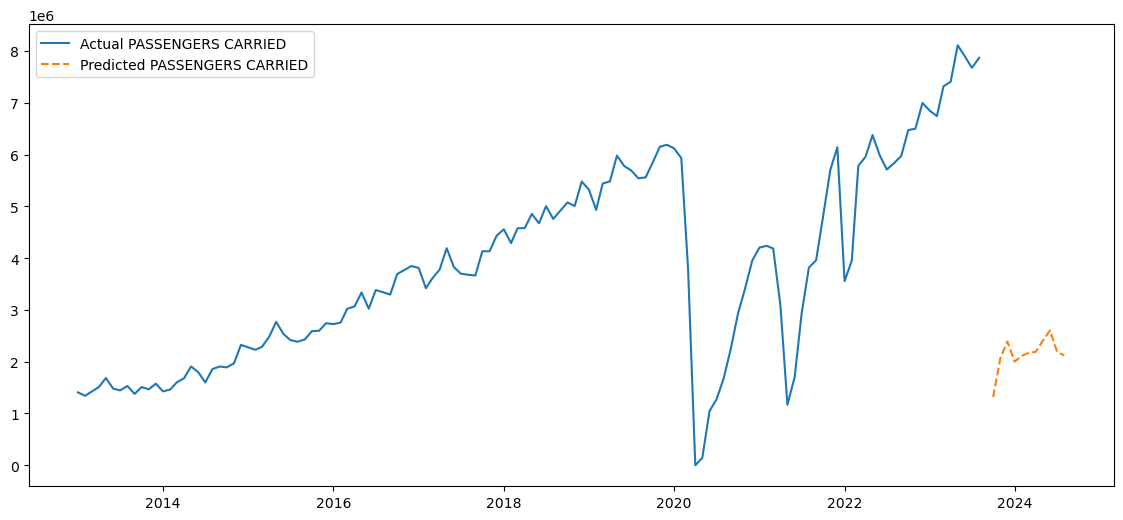

129   2023-09-30
130   2023-10-31
131   2023-11-30
132   2023-12-31
133   2024-01-31
134   2024-02-29
135   2024-03-31
136   2024-04-30
137   2024-05-31
138   2024-06-30
139   2024-07-31
Name: ds, dtype: datetime64[ns] 129    1.316906e+06
130    2.067208e+06
131    2.391833e+06
132    2.002217e+06
133    2.112962e+06
134    2.170063e+06
135    2.191516e+06
136    2.404104e+06
137    2.605715e+06
138    2.192019e+06
139    2.120529e+06
Name: yhat, dtype: float64


<Figure size 640x480 with 0 Axes>

In [5]:
forecast_filtered = forecast[(forecast['ds'] >= '2023-09-01') & (forecast['ds'] <= '2024-08-31')]

plt.figure(figsize=(14, 6))
plt.plot(list(data['ds']), list(data['PASSENGERS CARRIED']), label='Actual PASSENGERS CARRIED')
plt.plot(list(forecast_filtered['ds']), np.array(forecast_filtered['yhat']), label='Predicted PASSENGERS CARRIED', linestyle='--')
plt.legend()
plt.show()
plt.savefig('../images/2c.png')

print(forecast_filtered['ds'], forecast_filtered['yhat'])